In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import scipy.stats as ss
import seaborn as sb
import math

# Підготовка датасету (Лабораторна робота 1)

In [2]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.dtypes)
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Rows:  891
Columns:  12


In [4]:
def quantitative(df) : 
    table = pd.DataFrame(columns={"Показник" : 1, "Мінімум": 2, "Максимум": 3, "Середнє": 4, "Середньоквадратичне відхилення": 5, "1-й квартиль": 6, "2-й квартиль": 7, "3-й квартиль": 8})
    table.loc[len(table)] = ["Age", df["Age"].min(), df["Age"].max(), df["Age"].mean(), df["Age"].std(), df["Age"].quantile(0.25), df["Age"].quantile(0.50), df["Age"].quantile(0.75)]
    table.loc[len(table)] = ["SibSp", df["SibSp"].min(), df["SibSp"].max(), df["SibSp"].mean(), df["SibSp"].std(), df["SibSp"].quantile(0.25), df["SibSp"].quantile(0.50), df["SibSp"].quantile(0.75)]
    table.loc[len(table)] = ["Parch", df["Parch"].min(), df["Parch"].max(), df["Parch"].mean(), df["Parch"].std(), df["Parch"].quantile(0.25), df["Parch"].quantile(0.50), df["Parch"].quantile(0.75)]
    table.loc[len(table)] = ["Fare", df["Fare"].min(), df["Fare"].max(), df["Fare"].mean(), df["Fare"].std(), df["Fare"].quantile(0.25), df["Fare"].quantile(0.50), df["Fare"].quantile(0.75)]
    display(table.style.hide_index()) 


def qualitative (df) : 
    table = pd.DataFrame(columns={"Показник" : 1, "Кількість унікальних значень": 2, "Частота кожного унікального значення": 3, "Відносна частота кожного унікального значення": 4})
    table.loc[len(table)] = ["Survived", df["Survived"].nunique(), df["Survived"].value_counts(dropna=False), df["Survived"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Pclass", df["Pclass"].nunique(), df["Pclass"].value_counts(dropna=False), df["Pclass"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Sex", df["Sex"].nunique(), df["Sex"].value_counts(dropna=False), df["Sex"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Embarked", df["Embarked"].nunique(), df["Embarked"].value_counts(dropna=False), df["Embarked"].value_counts(dropna=False, normalize=True)]
    display(table.style.hide_index()) 
    
print("\nКількісні показники\n")
quantitative(df)
print("\nЯкісні показники\n")
qualitative (df)


Кількісні показники



Показник,Мінімум,Максимум,Середнє,Середньоквадратичне відхилення,1-й квартиль,2-й квартиль,3-й квартиль
Age,0.420000,80.000000,29.699118,14.526497,20.125000,28.000000,38.000000
SibSp,0.000000,8.000000,0.523008,1.102743,0.000000,0.000000,1.000000
Parch,0.000000,6.000000,0.381594,0.806057,0.000000,0.000000,0.000000
Fare,0.000000,512.329200,32.204208,49.693429,7.910400,14.454200,31.000000



Якісні показники



Показник,Кількість унікальних значень,Частота кожного унікального значення,Відносна частота кожного унікального значення
Survived,2,"0 549 1 342 Name: Survived, dtype: int64","0 0.616162 1 0.383838 Name: Survived, dtype: float64"
Pclass,3,"3 491 1 216 2 184 Name: Pclass, dtype: int64","3 0.551066 1 0.242424 2 0.206510 Name: Pclass, dtype: float64"
Sex,2,"male 577 female 314 Name: Sex, dtype: int64","male 0.647587 female 0.352413 Name: Sex, dtype: float64"
Embarked,3,"S 644 C 168 Q 77 NaN 2 Name: Embarked, dtype: int64","S 0.722783 C 0.188552 Q 0.086420 NaN 0.002245 Name: Embarked, dtype: float64"


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

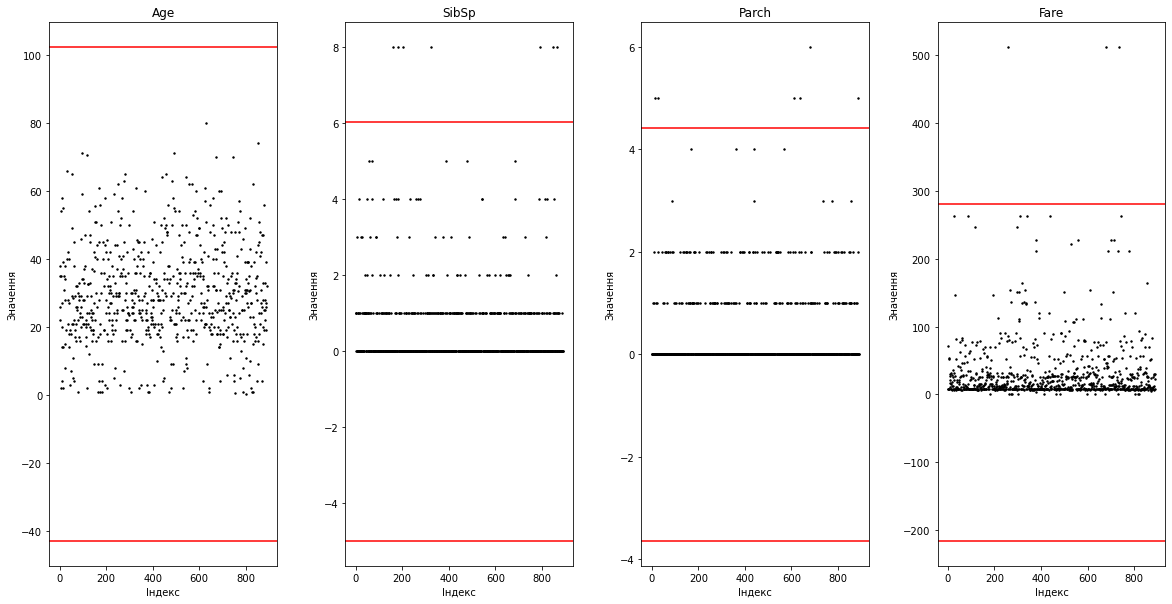

In [6]:
def get_diapazon(data) :
    u = 5
    mean = data.mean()
    std = data.std()
    a = mean - (u * std)
    b = mean + (u * std)
    return a, b

def get_anomalies_chart(data, title) :
    chart = plt.scatter(data.index, data, color = 'black', s = 2)
    plt.title(title)
    plt.xlabel("Індекс")
    plt.ylabel("Значення")
    a, b = get_diapazon(data)
    plt.axhline(y = a, color = 'r')
    plt.axhline(y = b, color = 'r')
    return chart

def get_figure_an(df) :
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 4, 1)
    chart = get_anomalies_chart(df["Age"], "Age")
    plt.subplot(1, 4, 2)
    chart = get_anomalies_chart(df["SibSp"], "SibSp")
    plt.subplot(1, 4, 3)
    chart = get_anomalies_chart(df["Parch"], "Parch")
    plt.subplot(1, 4, 4)
    chart = get_anomalies_chart(df["Fare"], "Fare")
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    
    
get_figure_an(df)

def replace_anomalies(title) :
    a, b = get_diapazon(df[title])
    df.loc[(df[title] < a), title] = None
    df.loc[(df[title] > b), title] = None
       
replace_anomalies("Fare")

In [7]:
means = df.mean()
df = df.fillna(means)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [8]:
for name, values in df[["Survived", "Pclass", "Sex", "Embarked"]].iteritems() :
    val = list(values.value_counts(dropna=False).to_dict().keys())[0]
    values = values.fillna(val)
    df[name] = values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

([<matplotlib.patches.Wedge at 0x17af7af4670>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

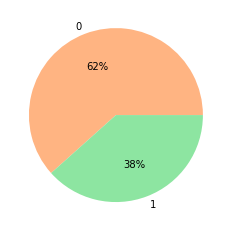

In [10]:
plt.pie(df['Survived'].value_counts(dropna=False), labels=df['Survived'].unique(), autopct='%.0f%%', colors=sb.color_palette('pastel')[1:3])

In [11]:
df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [12]:
df = pd.get_dummies(df, columns=['Pclass','Embarked'], drop_first=True)
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0,0,0,0


In [13]:
# Нормалізація
for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    min_v = values.min()
    max_v = values.max()
    values = pd.Series((v - min_v) / (max_v - min_v) for v in values)
    df[name] = values

In [14]:
df = df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,0,0.271174,0.125,0.000000,0.027567,0,1,0,1
1,1,1,0.472229,0.125,0.000000,0.271039,0,0,0,0
2,1,1,0.321438,0.000,0.000000,0.030133,0,1,0,1
3,1,1,0.434531,0.125,0.000000,0.201901,0,0,0,1
4,0,0,0.434531,0.000,0.000000,0.030608,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
887,1,1,0.233476,0.000,0.000000,0.114068,0,0,0,1
888,0,1,0.367921,0.125,0.333333,0.089163,0,1,0,1
889,1,0,0.321438,0.000,0.000000,0.114068,0,0,0,0


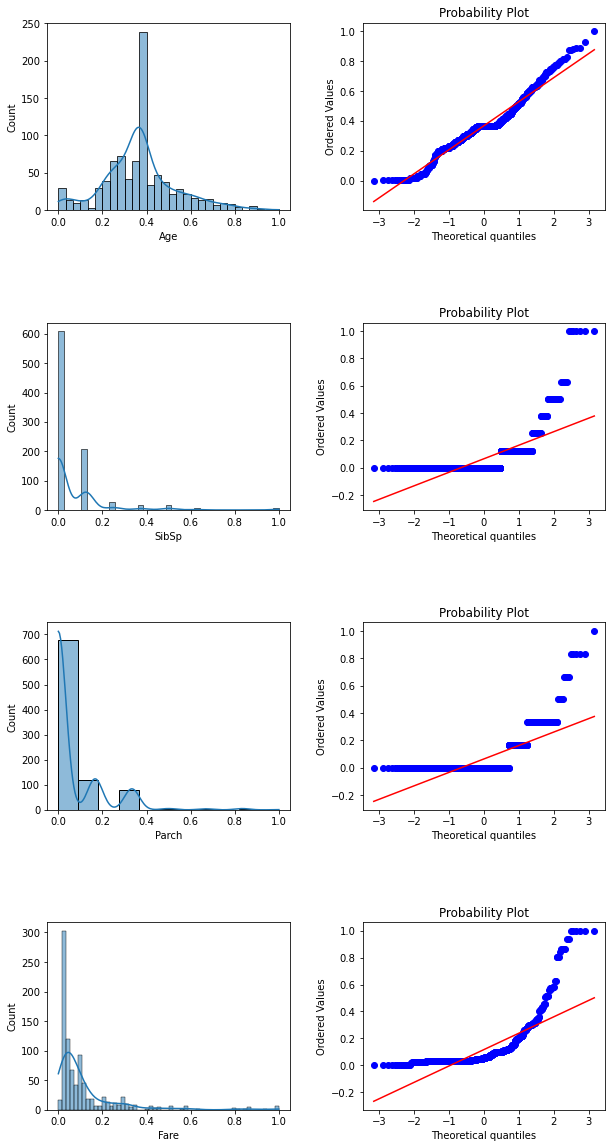

In [15]:
def get_hist_and_prob(df) :
    plt.figure(figsize=(10, 20))
    plt.subplot(4, 2, 1)
    sb.histplot(df["Age"], kde = True)
    plt.subplot(4, 2, 2)
    ss.probplot(df["Age"], plot = plt)
    plt.subplot(4, 2, 3)
    sb.histplot(df["SibSp"], kde = True)
    plt.subplot(4, 2, 4)
    ss.probplot(df["SibSp"], plot = plt)
    plt.subplot(4, 2, 5)
    sb.histplot(df["Parch"], kde = True)
    plt.subplot(4, 2, 6)
    ss.probplot(df["Parch"], plot = plt)
    plt.subplot(4, 2, 7)
    sb.histplot(df["Fare"], kde = True)
    plt.subplot(4, 2, 8)
    ss.probplot(df["Fare"], plot = plt)
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    
    
get_hist_and_prob(df)


# Лабораторна робота 2

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV

In [17]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,0,0.271174,0.125,0.000000,0.027567,0,1,0,1
1,1,1,0.472229,0.125,0.000000,0.271039,0,0,0,0
2,1,1,0.321438,0.000,0.000000,0.030133,0,1,0,1
3,1,1,0.434531,0.125,0.000000,0.201901,0,0,0,1
4,0,0,0.434531,0.000,0.000000,0.030608,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
887,1,1,0.233476,0.000,0.000000,0.114068,0,0,0,1
888,0,1,0.367921,0.125,0.333333,0.089163,0,1,0,1
889,1,0,0.321438,0.000,0.000000,0.114068,0,0,0,0


In [18]:
# Розбивання підготовленого в ЛР1 датасету на х та у

X = df.iloc[:, 1:]
y = df['Survived']

In [19]:
# Створити три різних класифікатори з гіперпараметрами по замовчуванню

DTClsf = DecisionTreeClassifier()
KNClsf = KNeighborsClassifier()
LRClsf = LogisticRegression()

In [20]:
# Навчити ці класифікатори на усьому наборі даних і за можливості візуалізувати їх

DTClsf.fit(X, y)
KNClsf.fit(X, y)
LRClsf.fit(X, y)

LogisticRegression()

[Text(913.5108037860576, 1593.7363636363636, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(465.68939603365385, 1519.6090909090908, 'X[1] <= 0.076\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(212.38875, 1445.4818181818182, 'X[2] <= 0.312\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(202.08721153846153, 1371.3545454545454, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(222.69028846153847, 1371.3545454545454, 'X[4] <= 0.119\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(212.38875, 1297.2272727272727, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(232.99182692307693, 1297.2272727272727, 'X[4] <= 0.135\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(222.69028846153847, 1223.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(243.29336538461538, 1223.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(718.9900420673077, 1445.4818181818182, 'X[4] <= 0.1\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(421.18604567307693, 

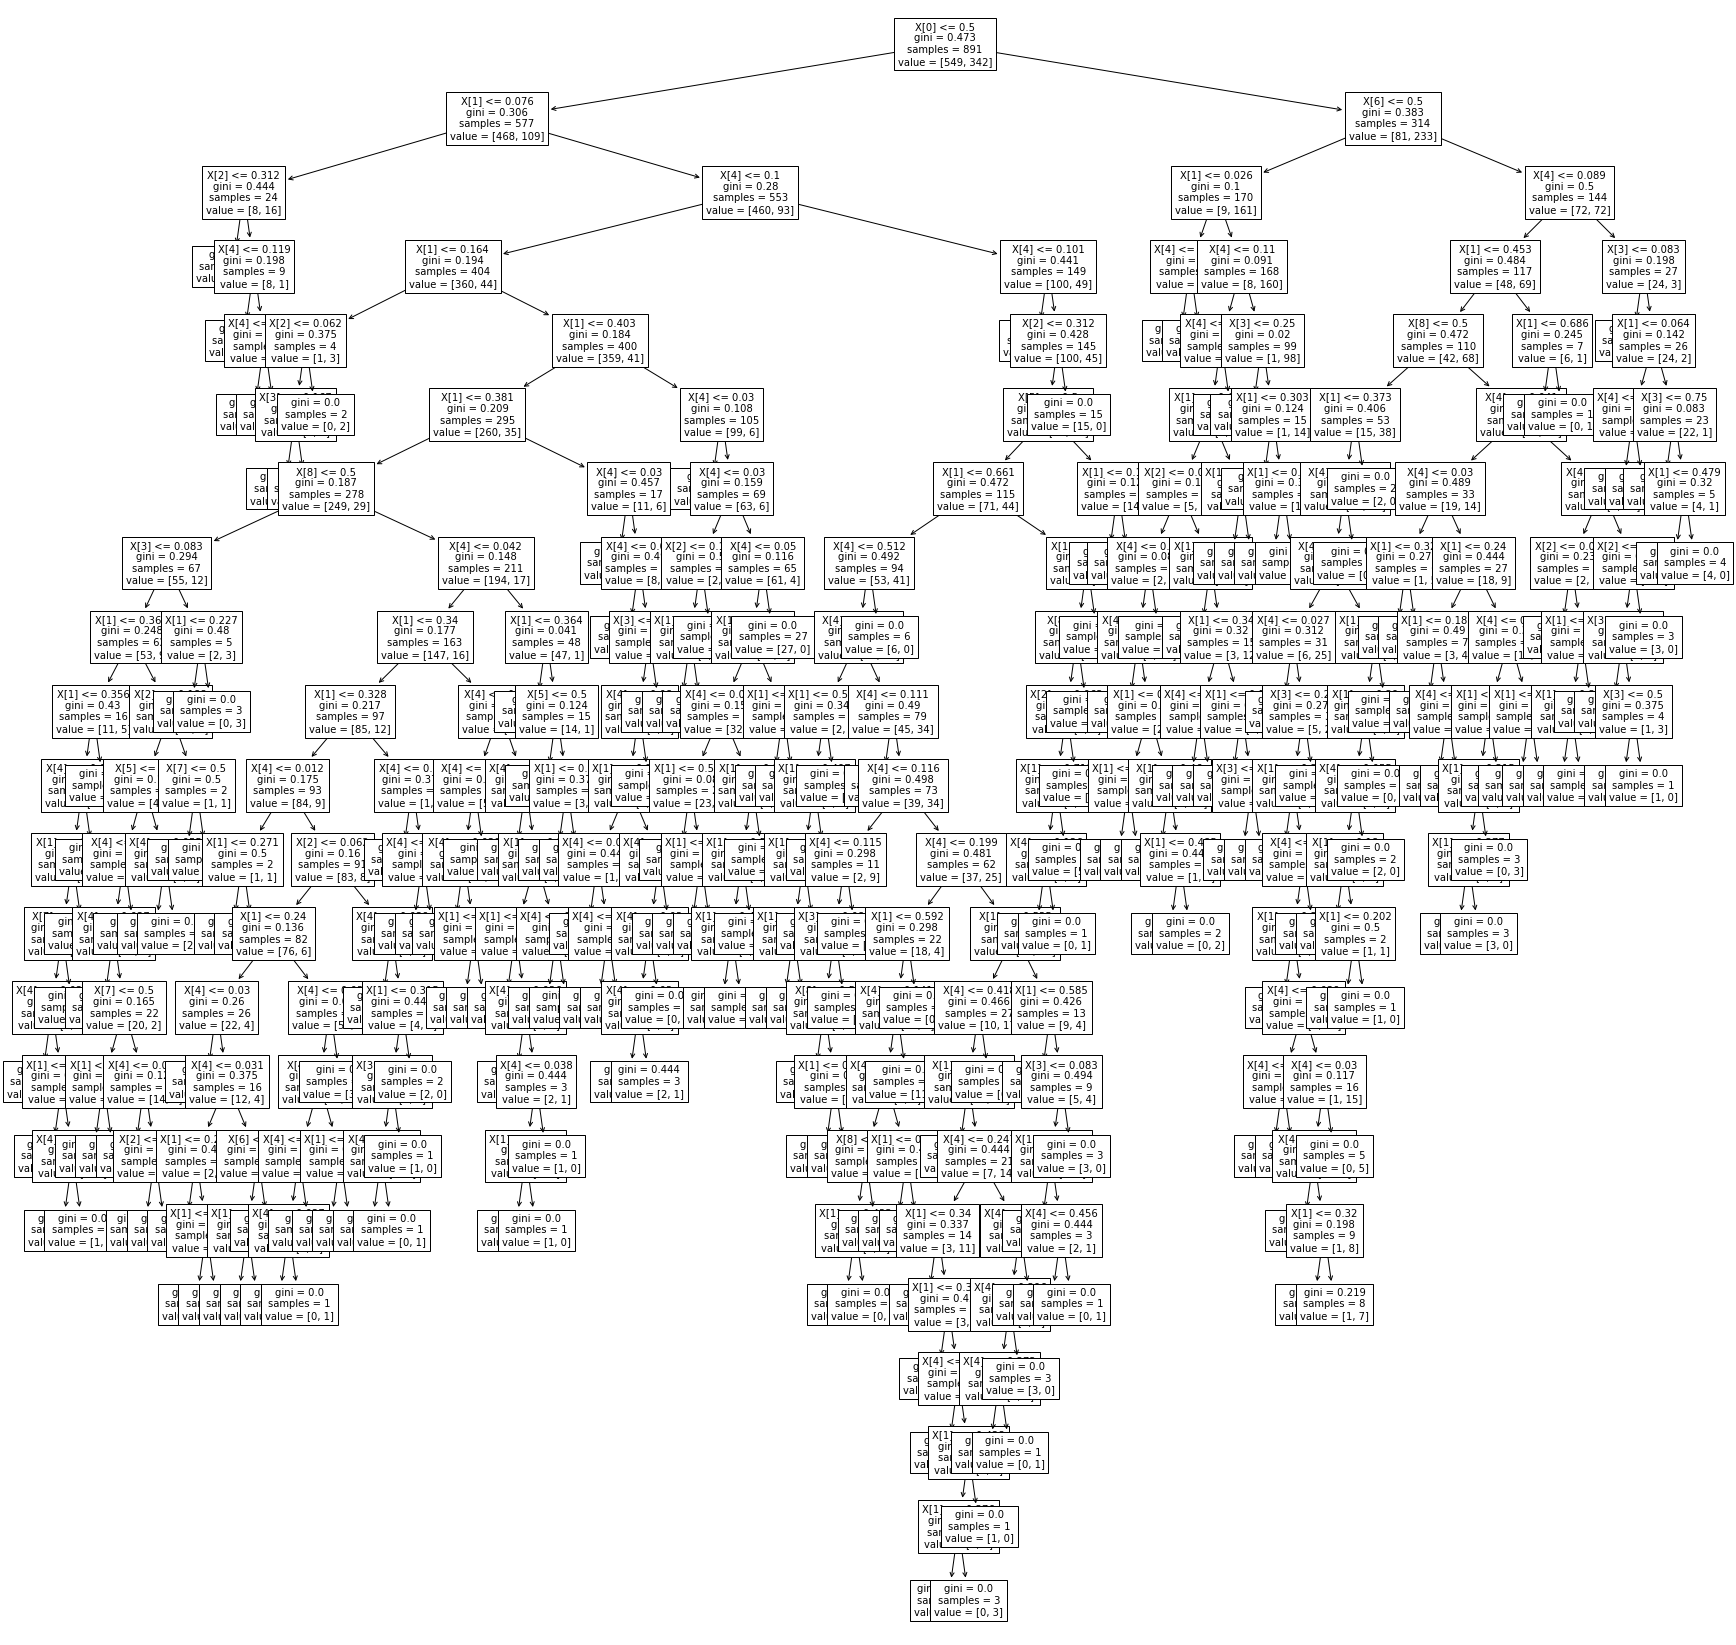

In [21]:
plt.figure(figsize=(30, 30))
plot_tree(DTClsf, fontsize=10)

In [22]:
# Після цього слід вручну створити тестовий набір даних з декількох об’єктів і одержати прогнози цільової ознаки за допомогою навчених класифікаторів

X_test = [
    [1, 0.27, 0.0, 0.0, 0.09, 1, 0, 0, 1],
    [0, 0.96, 0.125, 0.3, 0.17, 0, 1, 0, 0],
    [0, 0.57, 0.0, 0.16, 0.03, 1, 0, 1, 0]
]

X_test

[[1, 0.27, 0.0, 0.0, 0.09, 1, 0, 0, 1],
 [0, 0.96, 0.125, 0.3, 0.17, 0, 1, 0, 0],
 [0, 0.57, 0.0, 0.16, 0.03, 1, 0, 1, 0]]

In [23]:
DTClsf.predict(X_test)

array([1, 1, 0], dtype=int64)

In [24]:
KNClsf.predict(X_test)

array([1, 0, 0], dtype=int64)

In [25]:
LRClsf.predict(X_test)

array([1, 0, 0], dtype=int64)

## Техніки відкладеної вибірки

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
465,0,0.472229,0.000,0.000000,0.026806,0,1,0,1
58,1,0.057552,0.125,0.333333,0.105513,1,0,0,1
775,0,0.220910,0.000,0.000000,0.029468,0,1,0,1
295,0,0.367921,0.000,0.000000,0.105402,0,0,0,0
221,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
525,0,0.503644,0.000,0.000000,0.029468,0,1,1,0
853,1,0.195778,0.000,0.166667,0.149810,0,0,0,1
425,0,0.367921,0.000,0.000000,0.027567,0,1,0,1


In [27]:
y_train

465    0
58     1
775    0
295    0
221    0
      ..
886    0
525    0
853    1
425    0
114    0
Name: Survived, Length: 712, dtype: int64

#### DecisionTreeClassifier

In [28]:
DTClsf.fit(X_train, y_train)

y_predDTClsf = DTClsf.predict(X_test)

In [29]:
confusion_matrix(y_test, y_predDTClsf)

array([[93, 21],
       [23, 42]], dtype=int64)

In [30]:
accuracy_score(y_test, y_predDTClsf)

0.7541899441340782

In [31]:
y_predDTClsf_train = DTClsf.predict(X_train)
accuracy_score(y_train, y_predDTClsf_train)

0.9901685393258427

In [32]:
f1_score(y_test, y_predDTClsf)

0.65625

#### KNeighborsClassifier

In [33]:
KNClsf.fit(X_train, y_train)

y_predKNClsf = KNClsf.predict(X_test)

In [35]:
confusion_matrix(y_test, y_predKNClsf)

array([[99, 15],
       [23, 42]], dtype=int64)

In [36]:
accuracy_score(y_test, y_predKNClsf)

0.7877094972067039

In [37]:
y_predKNClsf_train = KNClsf.predict(X_train)
accuracy_score(y_train, y_predKNClsf_train)

0.8665730337078652

In [38]:
f1_score(y_test, y_predKNClsf)

0.6885245901639344

#### LogisticRegression

In [39]:
LRClsf.fit(X_train, y_train)

y_predLRClsf = LRClsf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_predLRClsf)

array([[107,   7],
       [ 22,  43]], dtype=int64)

In [42]:
accuracy_score(y_test, y_predLRClsf)

0.8379888268156425

In [43]:
y_predLRClsf_train = LRClsf.predict(X_train)
accuracy_score(y_train, y_predLRClsf_train)

0.797752808988764

In [44]:
f1_score(y_test, y_predLRClsf)

0.7478260869565216

## Техніки ковзного контролю

In [45]:
num = 5
idx = 0
DTas_sum = 0
DTas_train_sum = 0
DTf1s_sum = 0
KNas_sum = 0
KNas_train_sum = 0
KNf1s_sum = 0
LRas_sum = 0
LRas_train_sum = 0
LRf1s_sum = 0

kf = KFold(n_splits=num, shuffle=True)

for train_index, test_index in kf.split(X) :
    idx = idx + 1
    print('\n--- ', idx)
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]
    
    X_train = df_train.iloc[:, 1:]
    y_train = df_train['Survived']
    
    X_test = df_test.iloc[:, 1:]
    y_test = df_test['Survived']
    
    
    print('\n--- DecisionTreeClassifier')
    DTClsf.fit(X_train, y_train)

    y_predDTClsf = DTClsf.predict(X_test)
    DTas = accuracy_score(y_test, y_predDTClsf)
    DTas_sum = DTas_sum + DTas
    print('accuracy_score : ', DTas)
    
    y_predDTClsf_train = DTClsf.predict(X_train)
    DTas_train = accuracy_score(y_train, y_predDTClsf_train)
    DTas_train_sum = DTas_train_sum + DTas_train
    print('accuracy_score train : ', DTas_train)
    
    DTf1s = f1_score(y_test, y_predDTClsf)
    DTf1s_sum = DTf1s_sum + DTf1s
    print('f1_score : ', DTf1s)
    
    print('confusion_matrix : ')
    print(confusion_matrix(y_test, y_predDTClsf))
    
    
    
    print('\n--- KNeighborsClassifier')
    KNClsf.fit(X_train, y_train)
    
    y_predKNClsf = KNClsf.predict(X_test)
    KNas = accuracy_score(y_test, y_predKNClsf)
    KNas_sum = KNas_sum + KNas
    print('accuracy_score : ', KNas)
    
    y_predKNClsf_train = KNClsf.predict(X_train)
    KNas_train = accuracy_score(y_train, y_predKNClsf_train)
    KNas_train_sum = KNas_train_sum + KNas_train
    print('accuracy_score train : ', KNas_train)
    
    KNf1s = f1_score(y_test, y_predKNClsf)
    KNf1s_sum = KNf1s_sum + KNf1s
    print('f1_score : ', KNf1s)
    
    print('confusion_matrix : ')
    print(confusion_matrix(y_test, y_predKNClsf))
    
    
    
    print('\n--- LogisticRegression')
    LRClsf.fit(X_train, y_train)
    
    y_predLRClsf = LRClsf.predict(X_test)
    LRas = accuracy_score(y_test, y_predLRClsf)
    LRas_sum = LRas_sum + LRas
    print('accuracy_score : ', LRas)
    
    y_predLRClsf_train = LRClsf.predict(X_train)
    LRas_train = accuracy_score(y_train, y_predLRClsf_train)
    LRas_train_sum = LRas_train_sum + LRas_train
    print('accuracy_score train : ', LRas_train)
    
    LRf1s = f1_score(y_test, y_predLRClsf)
    LRf1s_sum = LRf1s_sum + LRf1s
    print('f1_score : ', LRf1s)
    
    print('confusion_matrix : ')
    print(confusion_matrix(y_test, y_predLRClsf))


---  1

--- DecisionTreeClassifier
accuracy_score :  0.7597765363128491
accuracy_score train :  0.9845505617977528
f1_score :  0.7114093959731544
confusion_matrix : 
[[83 17]
 [26 53]]

--- KNeighborsClassifier
accuracy_score :  0.7541899441340782
accuracy_score train :  0.8679775280898876
f1_score :  0.6857142857142857
confusion_matrix : 
[[87 13]
 [31 48]]

--- LogisticRegression
accuracy_score :  0.776536312849162
accuracy_score train :  0.8047752808988764
f1_score :  0.7058823529411764
confusion_matrix : 
[[91  9]
 [31 48]]

---  2

--- DecisionTreeClassifier
accuracy_score :  0.7696629213483146
accuracy_score train :  0.9817671809256662
f1_score :  0.6666666666666667
confusion_matrix : 
[[96 25]
 [16 41]]

--- KNeighborsClassifier
accuracy_score :  0.8202247191011236
accuracy_score train :  0.8555399719495091
f1_score :  0.7333333333333333
confusion_matrix : 
[[102  19]
 [ 13  44]]

--- LogisticRegression
accuracy_score :  0.8033707865168539
accuracy_score train :  0.798036465638

In [46]:
print('\n--- DecisionTreeClassifier')
print('accuracy_score :', DTas_sum / num)
print('accuracy_score train :', DTas_train_sum / num)
print('f1_score :', DTf1s_sum / num)
    
print('\n--- KNeighborsClassifier')
print('accuracy_score :', KNas_sum / num)
print('accuracy_score train :', KNas_train_sum / num)
print('f1_score :', KNf1s_sum / num)

print('\n--- LogisticRegression')
print('accuracy_score :', LRas_sum / num)
print('accuracy_score train :', LRas_train_sum / num)
print('f1_score :', LRf1s_sum / num)


--- DecisionTreeClassifier
accuracy_score : 0.7620676668131317
accuracy_score train : 0.9848484012796066
f1_score : 0.6868795374624379

--- KNeighborsClassifier
accuracy_score : 0.8058941686020965
accuracy_score train : 0.8577469782687489
f1_score : 0.7375949153181148

--- LogisticRegression
accuracy_score : 0.7935095097608436
accuracy_score train : 0.8019087728698174
f1_score : 0.7168980661480513


In [47]:
cvDT = cross_validate(DTClsf, X, y, cv=KFold(n_splits=num, shuffle=True), scoring='accuracy', return_train_score=True)
print('--- DecisionTreeClassifier\n')
print('Test :', cvDT['test_score'].mean())
print('Train :', cvDT['train_score'].mean())

--- DecisionTreeClassifier

Test : 0.7845646852049463
Train : 0.9840072805206675


In [48]:
cvKN = cross_validate(KNClsf, X, y, cv=KFold(n_splits=num, shuffle=True), scoring='accuracy', return_train_score=True)
print('--- KNeighborsClassifier\n')
print('Test :', cvKN['test_score'].mean())
print('Train :', cvKN['train_score'].mean())

--- KNeighborsClassifier

Test : 0.8114493754315486
Train : 0.8574637155869329


In [49]:
cvLR = cross_validate(LRClsf, X, y, cv=KFold(n_splits=num, shuffle=True), scoring='accuracy', return_train_score=True)
print('--- LogisticRegression\n')
print('Test :', cvLR['test_score'].mean())
print('Train :', cvLR['train_score'].mean())

--- LogisticRegression

Test : 0.8002448057246877
Train : 0.8041536000756416


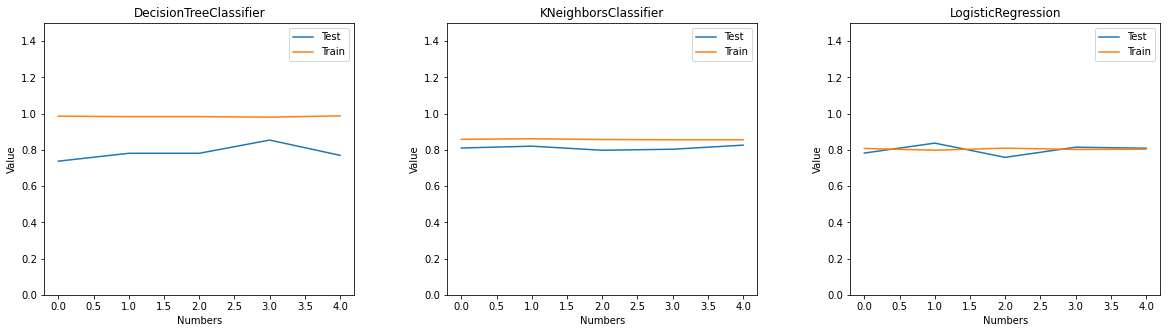

In [51]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(range(5), cvDT['test_score'], label='Test')
plt.plot(range(5), cvDT['train_score'], label='Train')
plt.legend()
plt.title('DecisionTreeClassifier')
plt.xlabel('Numbers')
plt.ylabel('Value')
plt.ylim(0, 1.5)

plt.subplot(1, 3, 2)
plt.plot(range(5), cvKN['test_score'], label='Test')
plt.plot(range(5), cvKN['train_score'], label='Train')
plt.legend()
plt.title('KNeighborsClassifier')
plt.xlabel('Numbers')
plt.ylabel('Value')
plt.ylim(0, 1.5)

plt.subplot(1, 3, 3)
plt.plot(range(5), cvLR['test_score'], label='Test')
plt.plot(range(5), cvLR['train_score'], label='Train')
plt.legend()
plt.title('LogisticRegression')
plt.xlabel('Numbers')
plt.ylabel('Value')
plt.ylim(0, 1.5)

plt.subplots_adjust(wspace=0.3, hspace=0.6)

In [128]:
DTcvs = cross_val_score(DTClsf, X, y, cv=5)
print(DTcvs.mean())

0.780082857322202


### Інші гіперпараметри

#### DecisionTreeClassifier

In [55]:
# 5. Спробувати створити класифікатори з іншими гіперпараметрами та оцінити якість їх прогнозів 
#    (тут можна використати будь-яку техніку оцінки якості – відкладену вибірку або ковзний контроль). 
#    На цьому етапі слід спробувати налаштувати декілька найважливіших гіперпараметрів, підібравши такі їх значення, за яких якість класифікації найвища. 
#    Корисною для цього може виявитися крива валідації. 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
DTClsf_my = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 5, random_state = 0)
DTClsf_my.fit(X_train, y_train)
predDTClsf_my = DTClsf_my.predict(X_test)
accuracy_score(y_test, predDTClsf_my)

0.8324022346368715

In [75]:
DTClsf_my2 = DecisionTreeClassifier(max_depth = 11, criterion = 'entropy', max_features = 5, random_state = 1)
DTClsf_my2.fit(X_train, y_train)
predDTClsf_my2 = DTClsf_my2.predict(X_test)
accuracy_score(y_test, predDTClsf_my2)

0.7988826815642458

In [77]:
DTClsf_my3 = DecisionTreeClassifier(max_depth = 6, criterion = 'gini', max_features = 5, random_state = 3)
DTClsf_my3.fit(X_train, y_train)
predDTClsf_my3 = DTClsf_my3.predict(X_test)
accuracy_score(y_test, predDTClsf_my3)

0.8435754189944135

In [92]:
DTClsf_my4 = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy', max_features = 5, random_state = 3)
DTClsf_my4.fit(X_train, y_train)
predDTClsf_my4 = DTClsf_my4.predict(X_test)
accuracy_score(y_test, predDTClsf_my4)

0.8379888268156425

In [109]:
DTClsf_my5 = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 7, random_state = 3)
DTClsf_my5.fit(X_train, y_train)
predDTClsf_my5 = DTClsf_my5.predict(X_test)
accuracy_score(y_test, predDTClsf_my5)

0.8268156424581006

In [107]:
DTClsf_my6 = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 6, random_state = 3)
DTClsf_my6.fit(X_train, y_train)
predDTClsf_my6 = DTClsf_my6.predict(X_test)
accuracy_score(y_test, predDTClsf_my6)

0.8212290502793296

0.7811813445483647


In [133]:
parameter_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7],
                  'max_depth' : [5, 6, 7, 8, 9],
                  'random_state' : [1, 2, 3],
                  'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(DTClsf, param_grid = parameter_grid, cv=10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8258998435054773
Best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'random_state': 3}


In [136]:
DTClsf_gs = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_features = 6, random_state = 3)
DTClsf_gs.fit(X_train, y_train)
predDTClsf_gs = DTClsf_gs.predict(X_test)
accuracy_score(y_test, predDTClsf_gs)

0.8100558659217877

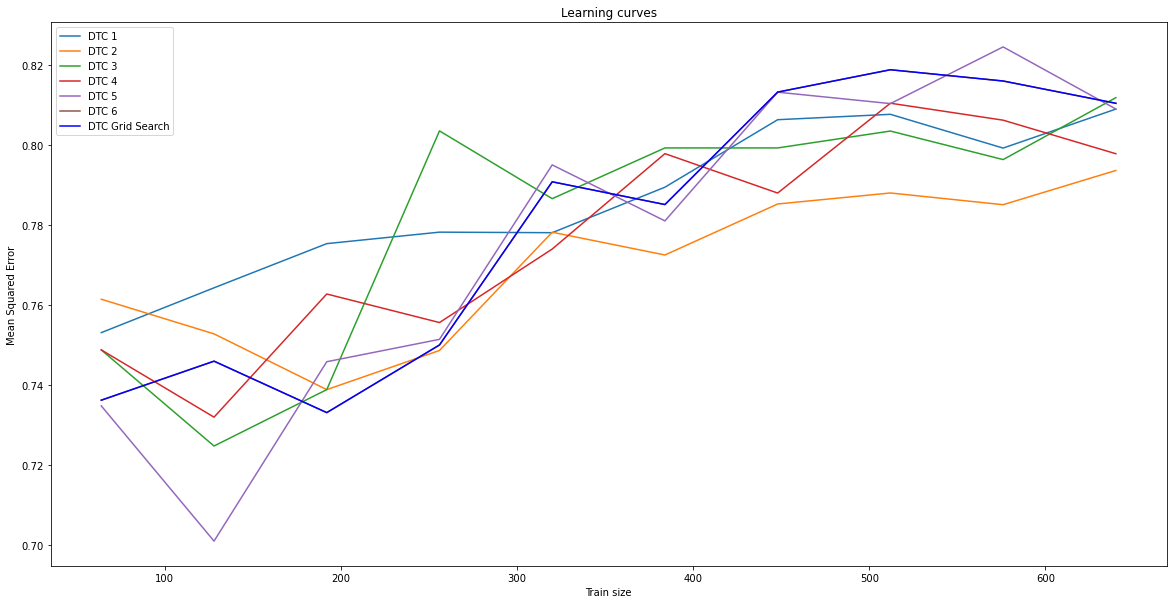

In [139]:
train_sizes_DT1, train_scores_DT1, test_scores_DT1 = learning_curve(DTClsf_my,  X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT2, train_scores_DT2, test_scores_DT2 = learning_curve(DTClsf_my2, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT3, train_scores_DT3, test_scores_DT3 = learning_curve(DTClsf_my3, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT4, train_scores_DT4, test_scores_DT4 = learning_curve(DTClsf_my4, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT5, train_scores_DT5, test_scores_DT5 = learning_curve(DTClsf_my5, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT6, train_scores_DT6, test_scores_DT6 = learning_curve(DTClsf_my6, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT_gs, train_scores_DT_gs, test_scores_DT_gs = learning_curve(DTClsf_gs, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.figure(figsize=(20, 10))
plt.plot(train_sizes_DT1, test_scores_DT1.mean(1), label="DTC 1")
plt.plot(train_sizes_DT2, test_scores_DT2.mean(1), label="DTC 2")
plt.plot(train_sizes_DT3, test_scores_DT3.mean(1), label="DTC 3")
plt.plot(train_sizes_DT4, test_scores_DT4.mean(1), label="DTC 4")
plt.plot(train_sizes_DT5, test_scores_DT5.mean(1), label="DTC 5")
plt.plot(train_sizes_DT6, test_scores_DT6.mean(1), label="DTC 6")
plt.plot(train_sizes_DT6, test_scores_DT6.mean(1), color='b', label="DTC Grid Search")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

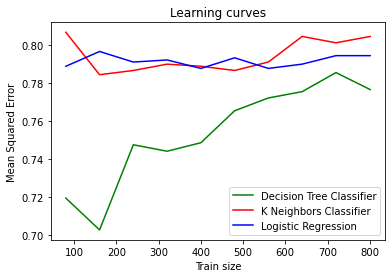

In [53]:
train_sizes_DT, train_scores_DT, test_scores_DT = learning_curve(DTClsf, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN, train_scores_KN, test_scores_KN = learning_curve(KNClsf, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR, train_scores_LR, test_scores_LR = learning_curve(LRClsf, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(train_sizes_DT, test_scores_DT.mean(1), color="g", label="Decision Tree Classifier")
plt.plot(train_sizes_KN, test_scores_KN.mean(1), color="r", label="K Neighbors Classifier")
plt.plot(train_sizes_LR, test_scores_LR.mean(1), color="b", label="Logistic Regression")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()